<a href="https://colab.research.google.com/github/rtajeong/Hallym_univ_M34/blob/main/hallym_lab02_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# nonlinear Classification

# KNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
iris = load_iris()

In [ ]:
X, y = iris.data, iris.target

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

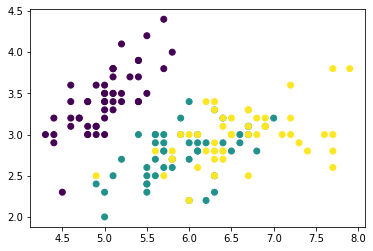

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# for testing data split in knn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

1.0

In [ ]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [ ]:
clf1 = SGDClassifier()
clf2 = KNeighborsClassifier(n_neighbors=9)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
print(clf1.score(X_test, y_test), clf2.score(X_test, y_test))

0.6666666666666666 0.9555555555555556


In [ ]:
for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  print("k is :", i, "---", knn.score(X_test, y_test))

k is : 1 --- 0.9555555555555556
k is : 2 --- 0.9555555555555556
k is : 3 --- 0.9555555555555556
k is : 4 --- 0.9555555555555556
k is : 5 --- 0.9555555555555556
k is : 6 --- 0.9555555555555556
k is : 7 --- 0.9555555555555556
k is : 8 --- 1.0
k is : 9 --- 0.9555555555555556


# K-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
knn = KNeighborsClassifier(n_neighbors=5)
cval = cross_val_score(knn, X, y, cv=5)
cval, cval.mean()

(array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 0.9733333333333334)

In [ ]:
# linear model (non-scaled)
clf = SGDClassifier()
cval = cross_val_score(clf, X, y, cv=5)
cval, cval.mean()

(array([1.        , 0.96666667, 0.8       , 0.73333333, 0.73333333]),
 0.8466666666666667)

In [ ]:
# linear model (scaled)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

clf = SGDClassifier()
cval = cross_val_score(clf, X_scaled, y, cv=5)
cval, cval.mean()

(array([1.        , 0.8       , 0.93333333, 0.93333333, 1.        ]),
 0.9333333333333333)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
cval = cross_val_score(knn, X_scaled, y, cv=5)
cval, cval.mean()

(array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]), 0.96)

# Decision Tree 

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9555555555555556


In [ ]:
clf.feature_importances_

array([0.03334241, 0.        , 0.55252884, 0.41412876])

In [ ]:

# decision tree graph
tree.plot_tree(clf, filled=True)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
export_graphviz(
    clf,
    out_file='./iris.dot',
    feature_names = iris.feature_names,
    class_names = iris.target_names,
    filled = True
    )

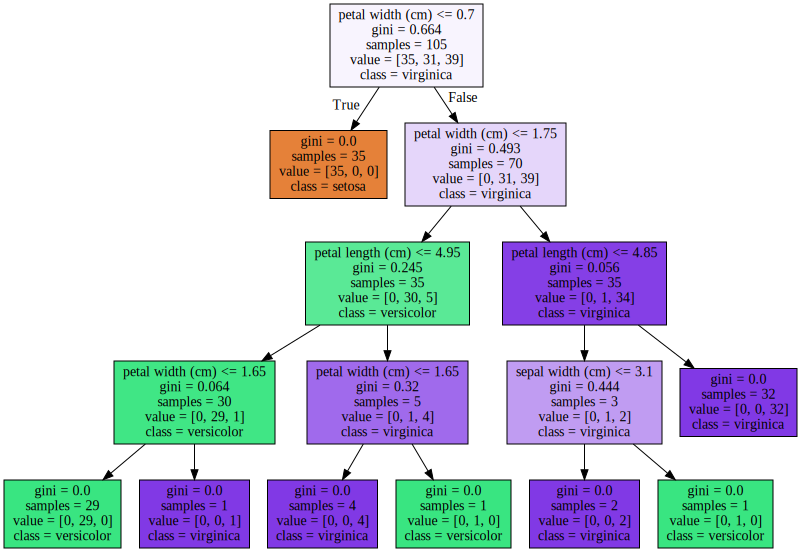

In [ ]:
with open("./iris.dot") as f:
  dot_graph = str(open("./iris.dot", "rb").read(), "utf8")
graphviz.Source(dot_graph)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)


0.9777777777777777

In [ ]:
rfc.feature_importances_

array([0.10536125, 0.03352916, 0.48712012, 0.37398946])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gbc = GradientBoostingClassifier(n_estimators = 200)
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.9777777777777777

In [ ]:
gbc.feature_importances_

array([0.01393196, 0.00458026, 0.79810401, 0.18338377])

# with little bigger dataset

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9122807017543859

In [ ]:
X.shape, y.shape

((569, 30), (569,))

In [ ]:
clf.feature_importances_

array([0.        , 0.02751574, 0.        , 0.01082362, 0.00818593,
       0.00818593, 0.01064472, 0.        , 0.        , 0.        ,
       0.00259185, 0.        , 0.        , 0.03432097, 0.        ,
       0.        , 0.        , 0.        , 0.0122789 , 0.        ,
       0.        , 0.03706291, 0.        , 0.10169966, 0.        ,
       0.00727638, 0.01198463, 0.72742875, 0.        , 0.        ])

In [ ]:
# cancer.feature_names
df = pd.DataFrame(list(zip(cancer.feature_names, clf.feature_importances_)))

In [ ]:
df.columns = ['feature', 'importance']

In [ ]:
df = df.sort_values(by='importance', ascending=False)

In [ ]:
df.head()

,feature,importance
27,worst concave points,0.727429
23,worst area,0.101700
21,worst texture,0.037063
13,area error,0.034321
1,mean texture,0.027516


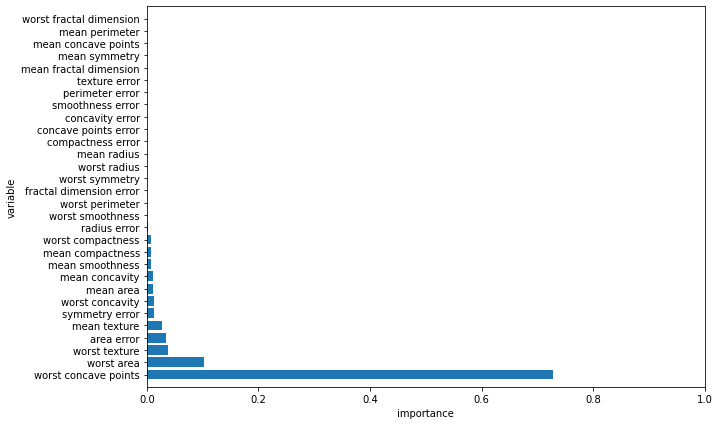

In [ ]:
x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('importance')
plt.ylabel('variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

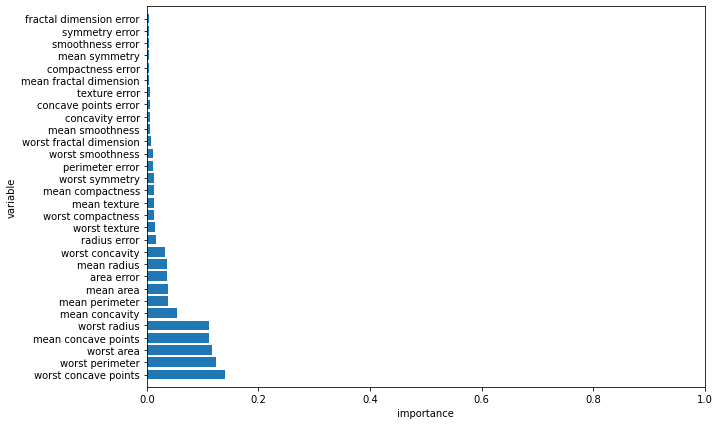

In [ ]:
# randomforest
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)
df = pd.DataFrame(list(zip(cancer.feature_names, rfc.feature_importances_)))
df.columns = ['feature', 'importance']
df = df.sort_values(by='importance', ascending=False)

x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('importance')
plt.ylabel('variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

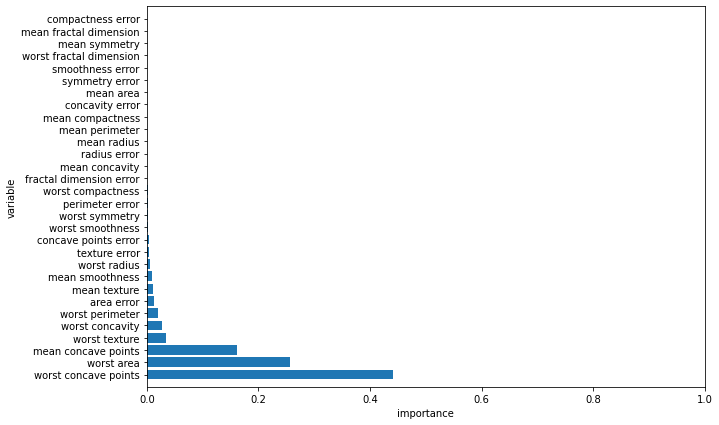

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=1000)
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

df = pd.DataFrame(list(zip(cancer.feature_names, gbc.feature_importances_)))
df.columns = ['feature', 'importance']
df = df.sort_values(by='importance', ascending=False)

x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('importance')
plt.ylabel('variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()